# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} + \frac{2\alpha}{n}\sum_{i=1}^{n}(y_i - <x_i,w_{old}>)x_i - \frac{2\alpha}{C}w_{old}\ ,$$

где $\alpha$ - темп обучения, $n$ - размер мини-батча.

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ grad_w(L) = \nabla_wL$$
$$1) \nabla_w<x,w> = (\frac{\delta (x_1w_1)}{\delta w_1},\frac{\delta (x_2w_2)}{\delta w_2},...,\frac{\delta (x_nw_n)}{\delta w_n})^T = (x_1,x_2,...,x_n)^T = x$$
$$2) \nabla\sum_{i=1}^{n}f_i = \sum_{i=1}^{n}\nabla f_i$$
$$3) \nabla_wf(w) = \frac{\delta f(w)}{\delta w}\nabla_ww $$

Для линейного случая
$$ - \nabla_w (\frac{\alpha}{n}\left[\sum_{i=1}^{n} (y_i - a_i) ^ 2 \right] + \alpha\sum_{j=1}^{D}\frac{w_j^2}{C})$$
$$\nabla_w (y_i - a(x_i,w))^2 = -2(y_i - a(x_i,w))\nabla_wa(x_i,w) $$
$$ w_{new} = w_{old} + \frac{2\alpha}{n}\sum_{i=1}^{n}(y_i - <x_i,w_{old}>)x_i - \frac{2\alpha}{C}w_{old}\ ,$$




Градиент- направление скорейшего роста. В итоговой формуле перед градиентом стоит знак минус, а значит там находится антиградиент -- направление скорейшего убывания функции. Таким образо антиградиент функции указывает направление минимума функции.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} + \frac{\alpha}{n}\sum_{i=1}^{n}(y_i - \sigma(<x_i,w_{old}>))x_i - \frac{2\alpha}{C}w_{old}\ ,$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$\frac{\delta\sigma(<x, w>)}{\delta w} = \frac{e^{-<x, w>}}{(1+e^{-<x, w>})^2} = (1-\sigma(<x, w>))\sigma(<x, w>)$$
$$ \nabla_w \frac{1}{n}\sum_{i = 0}^{i = n}(y_ilog(\sigma(<x_i,w>))+(1-y_i)log(1-\sigma(<x_i,w>))=$$
$$\frac{1}{n}\sum_{i = 0}^{i = n}(y_i(1-\sigma(<x_i,w>))x_i - (1-y_i)\sigma(<x_i,w>)x_i =$$  
$$=\frac{1}{n}\sum_{i = 0}^{i = n}(y_i - \sigma(<x_i,w>))x_i$$
$$w_{new} = w_{old} + \frac{\alpha}{n}\sum_{i = 0}^{i = n}(y_{(i)} - \sigma(<x_i, w_{old}>))x_{i} - \frac{2w_{old}}{C}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
* Первая задача
$$\frac{\delta L}{\delta w} = (X^TX)w-X^TY;$$
берем вторую производную по w
$$\frac{\delta^2L}{\delta w^2} = X^TX$$
Матрица $X^TX$ - матрица Грамма для ЛНЗ векторов-столбцов матрицы $X$, таким образом $X^TX$ положительно определенная, а значит достаточное условие минимума выполнено.

* Вторая
$$ \frac{\partial L(w)}{\partial w_j} = -\frac{2}{N}\sum_i^N \left[(y_i - <\,x_{i,j},w_j> ) x_{i,j} \right] + \frac{1}{C}\sum_{k=1}^{D} \frac{\partial w_k^2}{\partial w_j} = 0 $$

$$  -\frac{2}{N}\sum_i^N \left[(y_i - <\,x_{i,j},w_j> )x_{i,j} \right] + \frac{2}{C} w_j = 0 $$

$$(X^TX)w-X^TY+\frac{1}{C}w =0$$

$$w = (X^TX+\frac{1}{C}E)^{-1}X^TY $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$\frac{\delta E(L|x_i)}{\delta a(x_i)} = -\frac{p(y_i = 1|x_i)}{a(x_i)} + \frac{p(y_i= 0|x_i)}{1-a(x_i)} = 0$$
$$\frac{p(y_i = 1|x_i)}{a(x_i)} = \frac{p(y_i= 0|x_i)}{1-a(x_i)} = \frac{1-p(y_i= 1|x_i)}{1-a(x_i)}$$
$$p(y_i = 1|x_i) - a(x_i)p(y_i = 1|x_i) = a(x_i) - a(x_i)p(y_i = 1|x_i) = >$$
$$ a(x_i) = p(y_i = 1|x_i)$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

не думаю, что нужна. Поскольку мы не уверены, что отклонение от (0,0) малая велечина

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [28]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [29]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [30]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [31]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [32]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
#     X_batch = ""
#     y_batch = ""
    indices = np.array_split(
        np.random.permutation(X.shape[0]),
        np.around(X.shape[0]/batch_size)
    )
    for i in indices:
        X_batch = X[i, :]
        y_batch = y[i]
        yield (X_batch, y_batch)
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [39]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1+np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', thld=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.thld = thld  # ?
        self.fit_log = {'iter': [], 'loss': []}
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        pred = self.predict(X_batch)
        reg = np.sum(self.weights[1:] ** 2) / self.C
        if self.model_type == 'lin_reg':
            loss=np.sum((y_batch - pred) ** 2) / y_batch.shape[0]
        if self.model_type == 'log_reg':
            loss=-np.sum(y_batch * np.log(pred) +
            (1-y_batch) * np.log(1 - pred)) / y_batch.shape[0]
        loss += np.insert(reg, 0, 0)
        return loss
    
    def calc_loss_grad(self, X_batch_row, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        pred=self.predict(X_batch_row)
        X_batch=np.column_stack((np.ones(X_batch_row.shape[0]), X_batch_row))
        reg=2 * self.weights[1:]/self.C
        m = y_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss_grad=2/m * np.sum((pred - y_batch).reshape(-1, 1) * X_batch, axis=0)
        elif self.model_type == 'log_reg':
            loss_grad=-1/m * np.sum((y_batch - pred).reshape(-1, 1) * X_batch, axis=0)
        loss_grad += np.insert(reg, 0, 0)
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''       
        self.weights=np.random.randint(-4, 4, X.shape[1]+1) / 1
        for n in range(0, self.max_epoch):
            new_epoch_generator=self.batch_generator(X, y, batch_size=batch_size)
            f_loss=0
            k=0
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch=new_batch[0]
                y_batch=new_batch[1]
                batch_grad=self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss=self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                f_loss += batch_loss
                k=batch_num
            self.fit_log['iter'].append(n)
            self.fit_log['loss'].append(f_loss/(k+1))
        return self

    def predict(self, X_row):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
    
        X=np.column_stack((np.ones(X_row.shape[0]), X_row))
        pred=np.dot(X, self.weights.T)
        if self.model_type == 'lin_reg':
            y_hat=pred
        elif self.model_type == 'log_reg':
            sig=sigmoid(pred)
            y_hat=sig
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [34]:
def plot_decision_boundary(clf, x, col='r'):
    w0, w1, w2 = clf.weights
    y = lambda x, w0, w1, w2: -(w1 * (x) + w0)/w2 
    ax.plot(x, y(x, w0, w1, w2), color=col, label=clf.model_type)

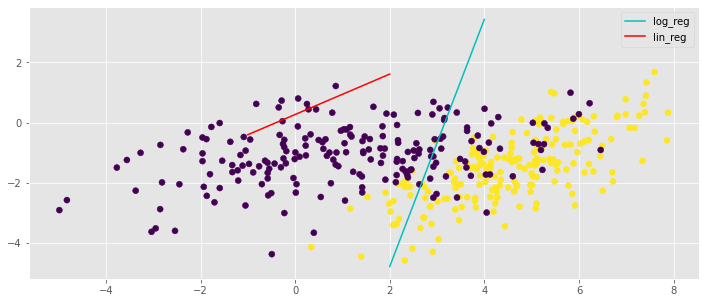

In [60]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)
fig = plt.figure()
ax = fig.add_subplot(111)

my_model1 = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=10)
my_model1.fit(X, y)
x = np.linspace(2, 4, 5)
plot_decision_boundary(my_model1, x, col='c')

my_model2 = MySGDClassifier(batch_generator, model_type='lin_reg', max_epoch=10)
my_model2.fit(X, y)
x = np.linspace(-1, 2, 5)
plot_decision_boundary(my_model2, x)

plt.legend()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [59]:
my_model2.weights

array([ 0.03744434,  0.08138312, -0.05119391])

In [37]:
# Точное решение
C = 1
X = np.column_stack((np.ones(X.shape[0]), X))
w_eq = np.dot(X.T, X) + np.eye(X.shape[1]) / C
w_eq = np.linalg.inv(w_eq)
w_eq = np.dot(w_eq, X.T)
w_eq = np.dot(w_eq, y)
w_eq

array([-0.12501327,  0.14328213, -0.16960361])

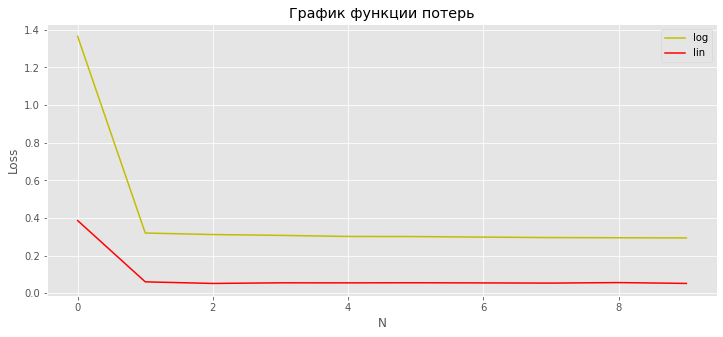

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(my_model1.fit_log['iter'], my_model1.fit_log['loss'], color='y', label = 'log')
ax.plot(my_model2.fit_log['iter'], my_model2.fit_log['loss'], color='r', label = 'lin')
# ax.plot(my_model1.errors_log['iter'], my_model1.errors_log['loss'], color='y', label = 'log')
# ax.plot(my_model2.errors_log['iter'], my_model2.errors_log['loss'], color='r', label = 'lin')
plt.title("График функции потерь")
plt.ylabel('Loss')
plt.xlabel('N')
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [40]:
from sklearn.datasets import make_classification

In [41]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

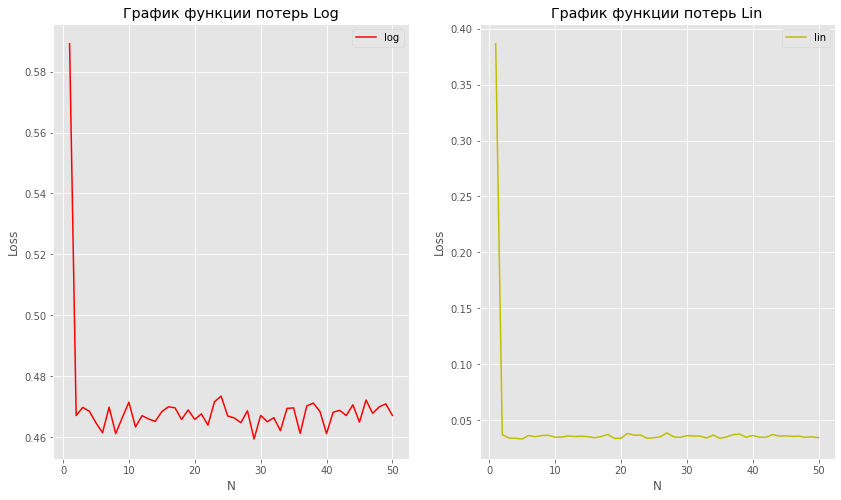

In [42]:
my_model1 = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=1)
my_model1.fit(X, y)

my_model2 = MySGDClassifier(batch_generator, model_type='lin_reg', max_epoch=1)
my_model2.fit(X, y)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# усредняем по н числам
N = 2000
m1 = np.asarray(my_model1.errors_log['loss'])
m1 = np.array_split(
    m1,
    np.around(m1.shape[0]/N)
)
m1_loss = list(map(np.mean, m1))
m1_x = range(1, len(m1_loss)+1)

m2 = np.asarray(my_model2.errors_log['loss'])
m2 = np.array_split(
    m2,
    np.around(m2.shape[0]/N)
)
m2_loss = list(map(np.mean, m2))
m2_x = range(1, len(m2_loss)+1)
ax1.set_title("График функции потерь Log")
ax2.set_title("График функции потерь Lin")
ax1.plot(m1_x, m1_loss, color='r', label='log')
ax2.plot(m2_x, m2_loss, color='y', label='lin')

ax1.set_ylabel('Loss')
ax1.set_xlabel('N')
ax2.set_ylabel('Loss')
ax2.set_xlabel('N')
ax1.legend()
ax2.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

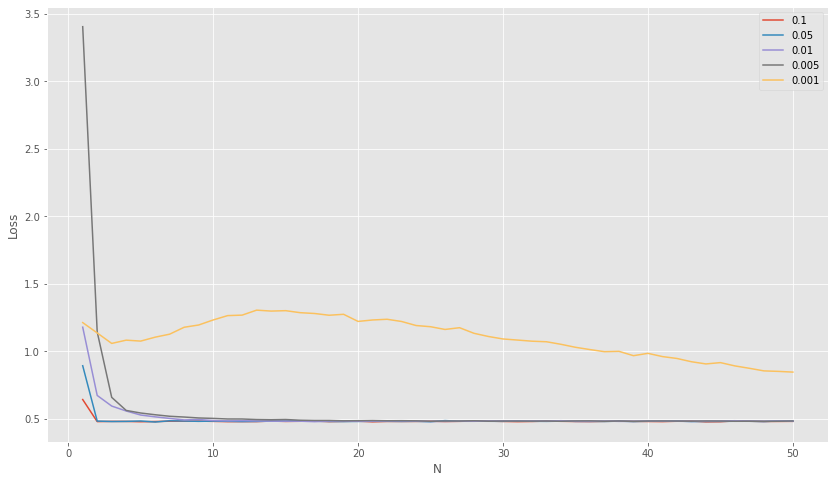

In [43]:
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]
# alphas = np.logspace(3, -3, 10)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

for al in alphas:
    my_model1 = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=5, alpha=al)
    my_model1.fit(X, y, batch_size=100) 
    N = 100
    m1 = np.asarray(my_model1.errors_log['loss'])
    m1 = np.array_split(
        m1,
        np.around(m1.shape[0]/N)
    )
    m1_loss = list(map(np.mean, m1))
    m1_x = range(1, len(m1_loss) + 1)
    ax.plot(m1_x, m1_loss, label="{}".format(al))
ax.set_ylabel('Loss')
ax.set_xlabel('N')
ax.legend()

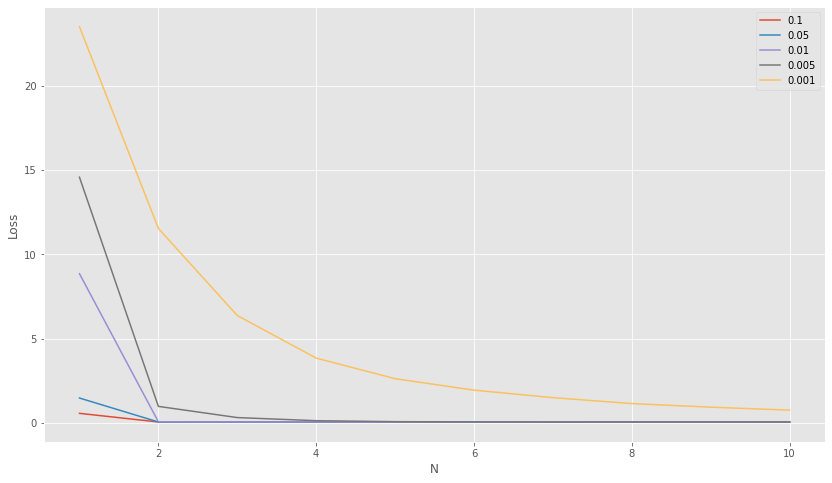

In [44]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

for al in alphas:
    my_model2 = MySGDClassifier(batch_generator, model_type='lin_reg', max_epoch=1, alpha=al)# проблема с w0 из за регуляризации
    my_model2.fit(X,y, batch_size=100)

    
    N = 100
    m2 = np.asarray(my_model2.errors_log['loss'])
    m2 = np.array_split(
        m2,
        np.around(m2.shape[0]/N)
    )
    m2_loss = list(map(np.mean, m2))
    m2_x = range(1, len(m2_loss) + 1)
    ax.plot(m2_x, m2_loss, label="{}".format(al))
ax.set_ylabel('Loss')
ax.set_xlabel('N')
ax.legend()

*для C*

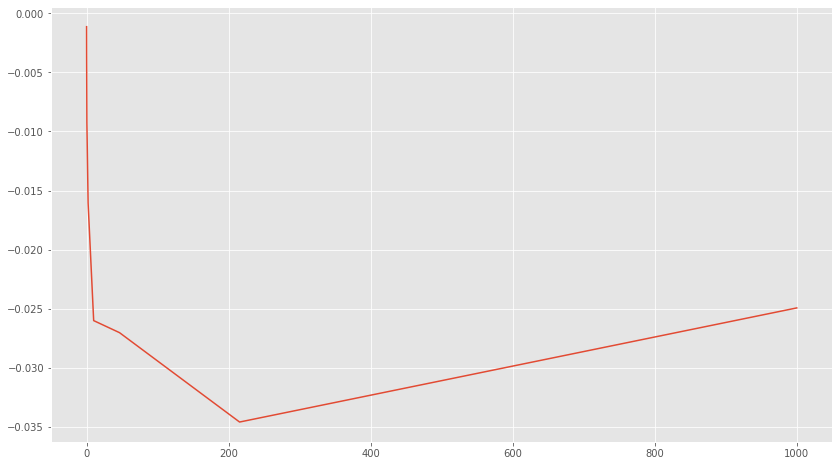

In [45]:
C_reg = np.logspace(-3, 3, 10)
C_reg = C_reg[2:]

np.random.seed()
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
mean = []

for c in C_reg:
    my_model1 = MySGDClassifier(batch_generator, model_type='lin_reg', max_epoch=1, C=c)
    my_model1.fit(X,y, batch_size=100)
    mean.append(my_model1.weights[1:].mean())
    
ax.plot(C_reg, mean)

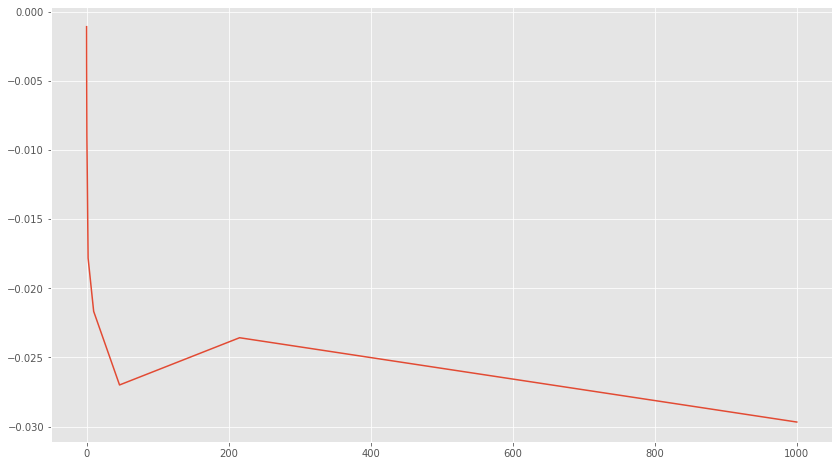

In [46]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
mean = []

for c in C_reg:
    my_model1 = MySGDClassifier(batch_generator, model_type='lin_reg', max_epoch=1, C=c)
    my_model1.fit(X,y, batch_size=100)
    mean.append(my_model1.weights[1:].mean())
    
ax.plot(C_reg, mean)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [47]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [48]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [49]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [50]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [51]:
stScaler = StandardScaler()
X_train = stScaler.fit_transform(X_train)

***C***

Text(0.5, 1.0, 'График функции потерь')

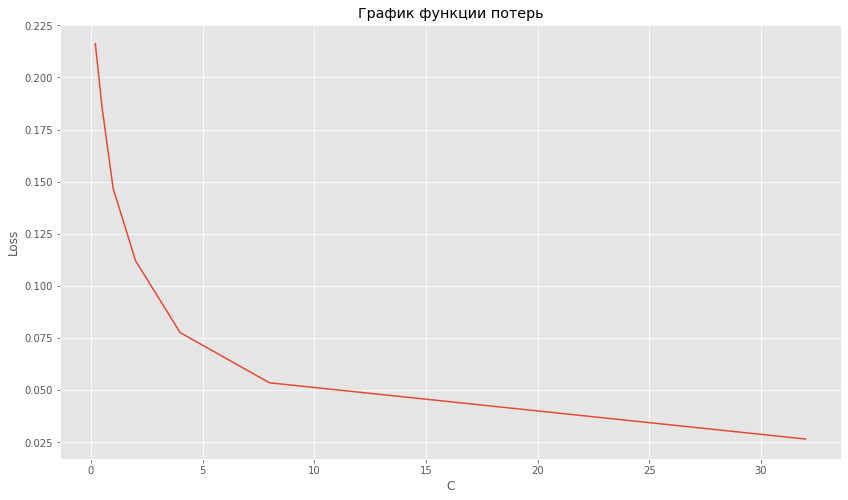

In [52]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
mean = [] # массив средних значений
C = [0.2, 0.5, 1, 2, 4, 8, 32]
kfold = StratifiedKFold(n_splits=3, shuffle=True)

for c in C:
    score = 0
    for tr, te in kfold.split(X_train, y_train):
        my_model = MySGDClassifier(
            batch_generator,
            model_type='log_reg',
            max_epoch=1,
            C=c 
        )
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]
        my_model.fit(X_tr, y_tr)
        pr = my_model.predict(X_te)
        score += np.mean(np.square(pr-y_te))
    mean.append(score/3)
ax.plot(C, mean)
ax.set_ylabel('Loss')
ax.set_xlabel('C')
ax.set_title("График функции потерь")
# ax.legend()

***Для параметра alpha***

Text(0.5, 1.0, 'График функции потерь')

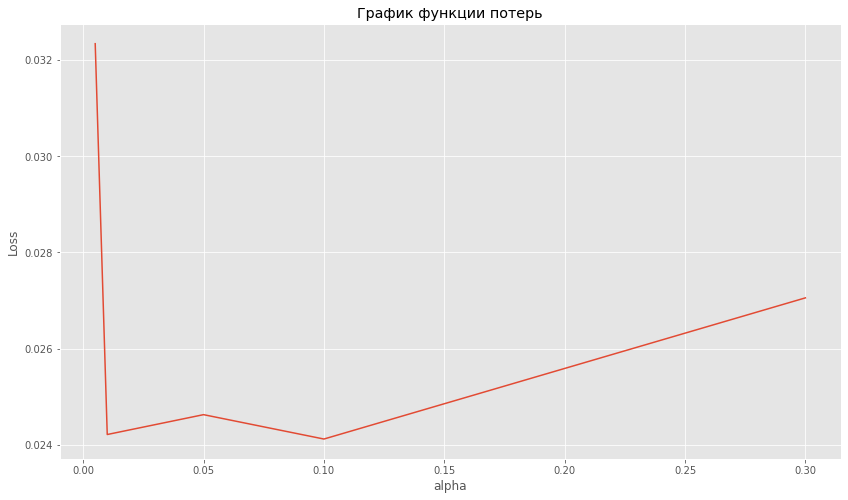

In [53]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
mean = [] # массив средних значений
alpha = [0.005, 0.01, 0.05, 0.1, 0.3]
kfold = StratifiedKFold(n_splits=3, shuffle=True)

for al in alpha:
    score = 0
    for tr, te in kfold.split(X_train, y_train):
        my_model = MySGDClassifier(
            batch_generator,
            model_type='log_reg',
            max_epoch=1,
            C=40,
            alpha=al
        )
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]
        my_model.fit(X_tr, y_tr)
        pr = my_model.predict(X_te)
        score += np.mean(np.square(pr-y_te))
    mean.append(score/3)
ax.plot(alpha, mean)
ax.set_ylabel('Loss')
ax.set_xlabel('alpha')
ax.set_title("График функции потерь")
# ax.legend()

***Для параметра Epoch***

Text(0.5, 1.0, 'График функции потерь')

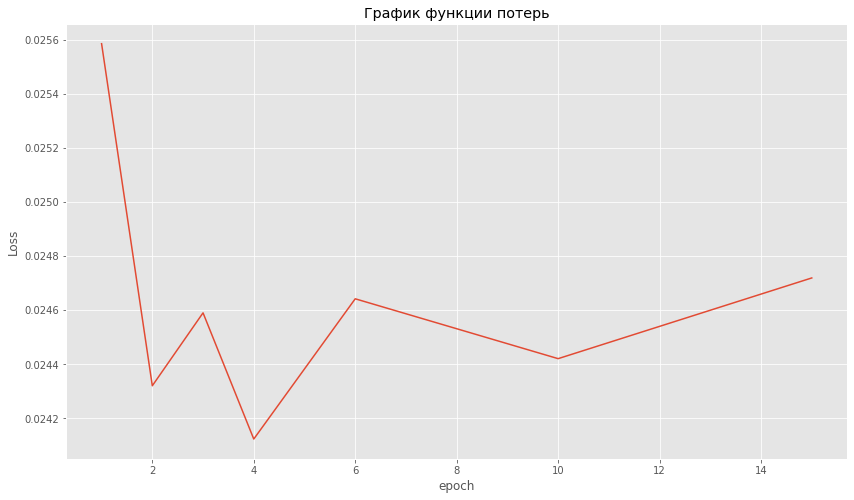

In [54]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
mean = [] # массив средних значений
ep = [1, 2,3, 4,6, 10,15]
kfold = StratifiedKFold(n_splits=3, shuffle=True)

for e in ep:
    score = 0
    for tr, te in kfold.split(X_train, y_train):
        my_model = MySGDClassifier(
            batch_generator,
            model_type='log_reg',
            max_epoch=e,
            C=40,
#             alpha=al
        )
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]
        my_model.fit(X_tr, y_tr)
        pr = my_model.predict(X_te)
        score += np.mean(np.square(pr-y_te))
    mean.append(score/3)
ax.plot(ep, mean)
ax.set_ylabel('Loss')
ax.set_xlabel('epoch')
ax.set_title("График функции потерь")
# ax.legend()

***Mod***

Text(0.5, 1.0, 'График функции потерь')

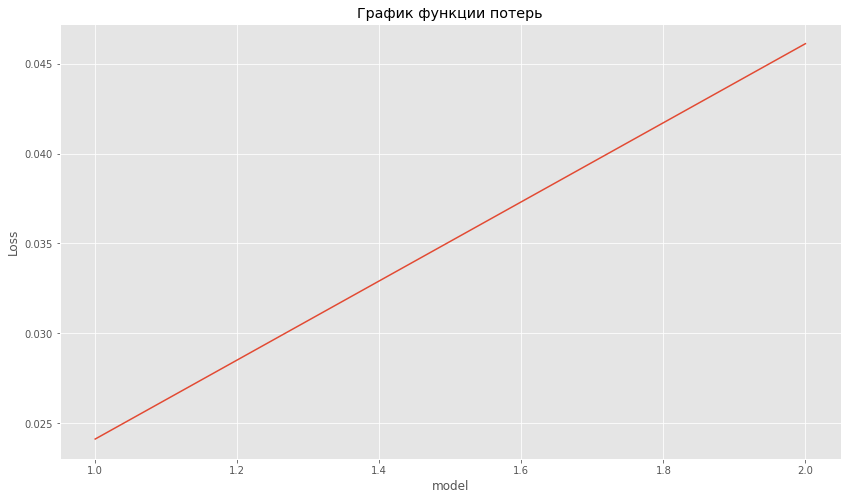

In [55]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
mean = [] # массив средних значений
mod = ['log_reg', 'lin_reg']
kfold = StratifiedKFold(n_splits=3, shuffle=True)

for m in mod:
    score = 0
    for tr, te in kfold.split(X_train, y_train):
        my_model = MySGDClassifier(
            batch_generator,
            model_type=m,
            max_epoch=10,
            C=40,
#             alpha=al
        )
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]
        my_model.fit(X_tr, y_tr)
        pr = my_model.predict(X_te)
        score += np.mean(np.square(pr-y_te))
    mean.append(score/3)
ax.plot([1,2], mean)
ax.set_ylabel('Loss')
ax.set_xlabel('model')
ax.set_title("График функции потерь")
# ax.legend()

***Thold***

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

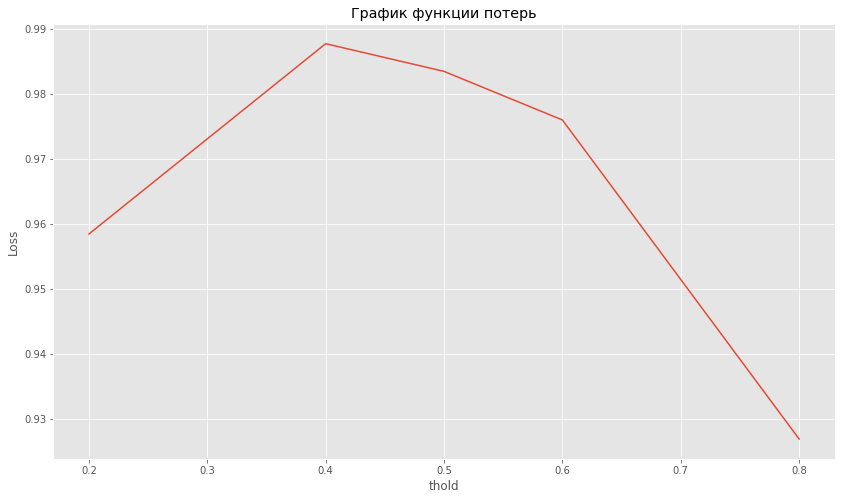

In [57]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
mean = [] # массив средних значений
thold = [0.2, 0.4, 0.5, 0.6, 0.8]
kfold = StratifiedKFold(n_splits=3, shuffle=True)

for t in thold:
    score = 0
    for tr, te in kfold.split(X_train, y_train):
        my_model = MySGDClassifier(
            batch_generator,
            model_type='log_reg',
            max_epoch=10,
            C=50,
        )
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]
        my_model.fit(X_tr, y_tr)
        pr = 1*(my_model.predict(X_te)-t>0)
        score += np.mean(f1_score(y_te, pr))
    mean.append(score/3)
ax.plot(thold, mean)
ax.set_ylabel('Loss')
ax.set_xlabel('thold')
ax.set_title("График функции потерь")
# ax.legend()
# 0.4
f1_score

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [61]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
   # target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
      #  y_train.append(target_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
#y_train = np.array(y_train)
groups_test = np.array(groups_test)
print (X_test.shape,groups_test.shape, X_train.shape)

(16627, 15) (16627,) (11690, 15)


In [62]:
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


In [63]:
my_model = MySGDClassifier(batch_generator,
                           model_type = 'log_reg',
                           max_epoch = 4,
                           C = 50,alpha = 0.01)
my_model.fit(X_train,y_train, batch_size = 10)

MySGDClassifier(C=50,
                batch_generator=<function batch_generator at 0x7f0f68bb5ea0>,
                max_epoch=4, model_type='log_reg')

In [64]:
t = 0.4
X_test = stScaler.fit_transform(X_test)
pred = 1*(my_model.predict(X_test)-t>0)

In [65]:
test_data = pd.read_csv('sample_submission.csv')
pair_id = test_data['pair_id']
Answer0 = pd.DataFrame({'pair_id':pair_id,'target':pred})
Answer0.to_csv('kaggle.csv',index=False, encoding='utf-8',sep =',')

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

In [ ]:
# а где trashhold